<a href="https://colab.research.google.com/github/Riyathakur0611/Fake-Profile-Detection/blob/main/support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import gender_guesser.detector as gender
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sexmachine.mapping import map_name
%matplotlib inline


In [ ]:
pip install sexmachine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sexmachine: filename=SexMachine-0.1.1-py3-none-any.whl size=379441 sha256=80a7a1b3579f93ff09f1f140a72998221e5fa126e647a9a6d66c5c3f7ea3c7de
  Stored in directory: /root/.cache/pip/wheels/1d/c5/29/23f0676f2b8fc6a8d678ac911993de922ea7dc64ccb187619d
Successfully built sexmachine


In [ ]:
pip install gender-guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade sexmachine

In [ ]:
mappings = ((256, ["<A/>"]),
            (257, ["<a/>"]),
            (258, ["<Â>"]),
            (259, ["<â>"]),
            (260, ["<A,>"]),
            (261, ["<a,>"]),
            (262, ["<C´>"]),
            (263, ["<c´>"]),
            (268, ["<C^>", "<CH>"]),
            (269, ["<c^>", "<ch>"]),
            (271, ["<d´>"]),
            (272, ["<Ð>", "<DJ>"]),
            (273, ["<ð>", "<dj>"]),
            (274, ["<E/>"]),
            (275, ["<e/>"]),
            (278, ["<E°>"]),
            (279, ["<e°>"]),
            (280, ["<E,>"]),
            (281, ["<e,>"]),
            (282, ["<Ê>"]),
            (283, ["<ê>"]),
            (287, ["<g^>"]),
            (290, ["<G,>"]),
            (286, ["<G^>"]),
            (291, ["<g´>"]),
            (298, ["<I/>"]),
            (299, ["<i/>"]),
            (304, ["<I°>"]),
            (305, ["<i>"]),
            (306, ["<IJ>"]),
            (307, ["<ij>"]),
            (310, ["<K,>"]),
            (311, ["<k,>"]),
            (315, ["<L,>"]),
            (316, ["<l,>"]),
            (317, ["<L´>"]),
            (318, ["<l´>"]),
            (321, ["<L/>"]),
            (322, ["<l/>"]),
            (325, ["<N,>"]),
            (326, ["<n,>"]),
            (327, ["<N^>"]),
            (328, ["<n^>"]),
            (336, ["<Ö>"]),
            (337, ["<ö>"]),
            (338, ["<OE>"]),
            (339, ["<oe>"]),
            (344, ["<R^>"]),
            (345, ["<r^>"]),
            (350, ["<S,>"]),
            (351, ["<s,>"]),
            (352, ["<S^>", "<SCH>", "<SH>"]),
            (353, ["<s^>", "<sch>", "<sh>"]),
            (354, ["<T,>"]),
            (355, ["<t,>"]),
            (357, ["<t´>"]),
            (362, ["<U/>"]),
            (363, ["<u/>"]),
            (366, ["<U°>"]),
            (367, ["<u°>"]),
            (370, ["<U,>"]),
            (371, ["<u,>"]),
            (379, ["<Z°>"]),
            (380, ["<z°>"]),
            (381, ["<Z^>"]),
            (382, ["<z^>"]),
            (7838, ["<ß>"]),
            )


def map_name(u):
    for code, patterns in mappings:
        for pattern in patterns:
            u = u.replace(pattern.decode("utf-8"), unichr(code))
    return u


In [ ]:
def read_datasets():
    """ Reads users profile from csv files """
    genuine_users = pd.read_csv("/content/users.csv")
    fake_users = pd.read_csv("/content/fusers.csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    x=pd.concat([genuine_users,fake_users])
    y=len(fake_users)*[0] + len(genuine_users)*[1]
    return x,y


In [ ]:
print(x)

              id              name      screen_name  statuses_count  \
0        3610511  Davide Dellacasa           braddd           20370   
1        5656162    Simone Economo            eKoeS            3131   
2        5682702            tacone          tacone_            4024   
3        6067292          alesaura         alesstar           40586   
4        6015122            Angelo       PerDiletto            2016   
...          ...               ...              ...             ...   
1332  1391497074       Verda Marks      VerdaMarks1               1   
1333  1391544607   Danial Campbell  DanialCampbell2               0   
1334  1391622127      Maudie Meyer     MaudieMeyer1               2   
1335  1391832212   Harriett Harvey  HarriettHarvey9               2   
1336  1391998039   Gillian Wheeler  GillianWheeler3               0   

      followers_count  friends_count  favourites_count  listed_count  \
0                5470           2385               145            52   
1  

In [ ]:
print(x.columns)

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import gender_guesser.detector as gender

# Predict sex function using gender-guesser
def predict_sex(name):
    sex_predictor = gender.Detector(case_sensitive=False)
    first_name = name.str.split(' ').str.get(0)  # Split and get the first name
    sex = first_name.apply(sex_predictor.get_gender)

    # Mapping genders to numeric codes
    sex_dict = {
        'female': -2,
        'mostly_female': -1,
        'unknown': 0,
        'mostly_male': 1,
        'male': 2,
        'andy': 0  # androgynous
    }
    return sex.map(sex_dict)

# Feature extraction function
def extract_features(x):
    # Check if 'lang_code' already exists
    if 'lang_code' not in x.columns:
        # If not, create 'lang_code' from 'lang'
        lang_list = list(enumerate(np.unique(x['lang'])))
        lang_dict = {name: i for i, name in lang_list}
        x['lang_code'] = x['lang'].map(lambda lang: lang_dict[lang]).astype(int)

    # Process the 'name' column to get 'sex_code'
    if 'sex_code' not in x.columns:
        x['sex_code'] = predict_sex(x['name'])

    # Select the features to use
    feature_columns_to_use = ['statuses_count', 'followers_count', 'friends_count',
                              'favourites_count', 'listed_count', 'sex_code', 'lang_code']

    # Subset the DataFrame to these columns
    x = x.loc[:, feature_columns_to_use]

    return x

# Example usage
print("extracting features.....\n")
x = extract_features(x)
print(x.columns)
print(x.describe())


extracting features.....

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'sex_code', 'lang_code'],
      dtype='object')
       statuses_count  followers_count  friends_count  favourites_count  \
count     2818.000000      2818.000000    2818.000000       2818.000000   
mean      1672.198368       371.105039     395.363023        234.541164   
std       4884.669157      8022.631339     465.694322       1445.847248   
min          0.000000         0.000000       0.000000          0.000000   
25%         35.000000        17.000000     168.000000          0.000000   
50%         77.000000        26.000000     306.000000          0.000000   
75%       1087.750000       111.000000     519.000000         37.000000   
max      79876.000000    408372.000000   12773.000000      44349.000000   

       listed_count     sex_code    lang_code  
count   2818.000000  2818.000000  2818.000000  
mean       2.818666    -0.191270     2.851313  
st

In [ ]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [ ]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)

    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [ ]:
def train(X_train,y_train,X_test):
    """ Trains and predicts dataset with a SVM classifier """
    # Scaling features
    X_train=preprocessing.scale(X_train)
    X_test=preprocessing.scale(X_test)

    Cs = 10.0 ** np.arange(-2,3,.5)
    gammas = 10.0 ** np.arange(-2,3,.5)
    param = [{'gamma': gammas, 'C': Cs}]
    cvk = StratifiedKFold(y_train,n_folds=5)
    classifier = SVC()
    clf = GridSearchCV(classifier,param_grid=param,cv=cvk)
    clf.fit(X_train,y_train)
    print("The best classifier is: ",clf.best_estimator_)
    clf.best_estimator_.fit(X_train,y_train)
    # Estimate score
    scores = cross_validation.cross_val_score(clf.best_estimator_, X_train,y_train, cv=5)
    print(scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title =('Learning Curves (SVM, rbf kernel)' %clf.best_estimator_.gamma)
    plot_learning_curve(clf.best_estimator_, title, X_train, y_train, cv=5)
    plt.show()
    # Predict class
    y_pred = clf.best_estimator_.predict(X_test)
    return y_test,y_pred


In [ ]:
print("reading datasets.....\n")
x,y=read_datasets()


reading datasets.....



In [ ]:
print("spliting datasets in train and test dataset...\n")
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=44)


spliting datasets in train and test dataset...



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train(x_train, y_train, x_test):
    # Initialize the model (e.g., RandomForestClassifier)
    model = RandomForestClassifier()

    # Fit the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    return y_test, y_pred

# Example usage
print("training datasets.......\n")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test, y_pred = train(x_train, y_train, x_test)

# Print results
print(f"Predictions: {y_pred}")
print(f"Actual: {y_test}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

training datasets.......

Predictions: [1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0
 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 

In [ ]:
print("training datasets.......\n")
y_test,y_pred = train(x_train,y_train,x_test)


training datasets.......



In [ ]:
print('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))


Classification Accuracy on Test dataset:  0.925531914893617


Confusion matrix, without normalization
[[266   4]
 [ 38 256]]


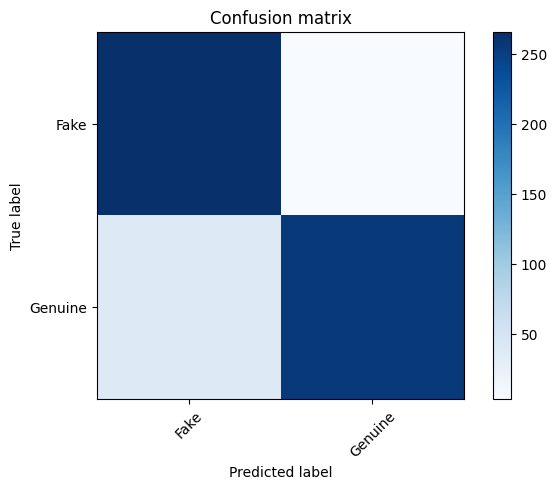

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(cm)
plot_confusion_matrix(cm)


Normalized confusion matrix
[[0.98518519 0.01481481]
 [0.1292517  0.8707483 ]]


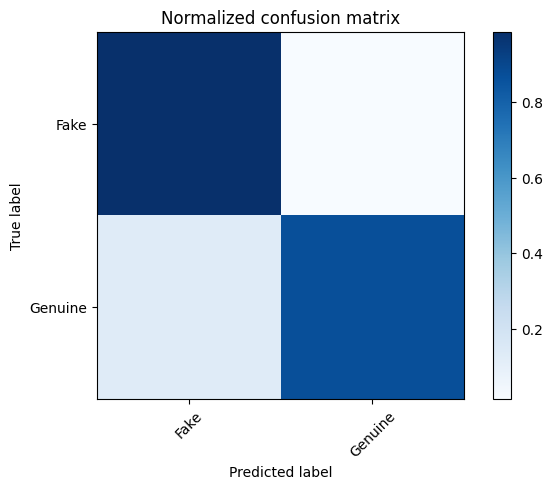

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))


              precision    recall  f1-score   support

        Fake       0.88      0.99      0.93       270
     Genuine       0.98      0.87      0.92       294

    accuracy                           0.93       564
   macro avg       0.93      0.93      0.93       564
weighted avg       0.93      0.93      0.93       564



False Positive rate:  [0.         0.01481481 1.        ]
True Positive rate:  [0.        0.8707483 1.       ]


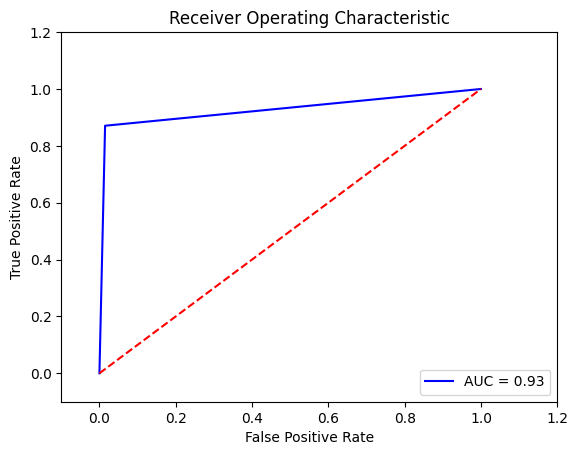

In [ ]:
plot_roc_curve(y_test, y_pred)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')